### How are in-demand skills trending for Data Analysts?

Methodology:

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the montly skill demand


In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [4]:
# Only get data analyst jobs in the US
df_DA_US = df.loc[
    (df["job_title"] == "Data Analyst") & (df["job_country"] == "United States")
].copy()
df_DA_US["job_posted_month_no"] = df_DA_US["job_posted_date"].dt.month
df_DA_US["job_posted_month"] = df_DA_US["job_posted_date"].dt.strftime("%b")

In [5]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no,job_posted_month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11,Nov
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']...",1,Jan
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,None,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",4,Apr
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,None,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",2,Feb
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,None,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']},1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint...",1,Jan
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,None,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e...",5,May
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,None,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'...",3,Mar
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud...",1,Jan


In [6]:
# Create pivot table after exploding job_skills column
df_DA_US_explode = df_DA_US.explode("job_skills")
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index=["job_posted_month_no", "job_posted_month"],
    columns="job_skills",
    aggfunc="size",
    fill_value=0,
)
df_DA_US_pivot.reset_index(level=0, drop=True, inplace=True)

In [7]:
# Sort columns descending
df_DA_US_pivot.loc["All"] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[
    df_DA_US_pivot.loc["All"].sort_values(ascending=False).index
]
df_DA_US_pivot.drop("All", inplace=True)
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
Feb,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
Mar,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
Apr,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
May,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
Jun,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
Jul,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
Aug,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
Sep,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [8]:
# Calculate % of skill counts per job counts
df_DA_US_job_counts = df_DA_US.groupby("job_posted_month").size()
df_DA_US_percent = df_DA_US_pivot.div(df_DA_US_job_counts, axis=0).reindex(
    df_DA_US_pivot.index
)
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0.626652,0.430066,0.355727,0.291300,0.179515,0.216960,0.186123,0.093062,0.096916,0.090308,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,0.609034,0.423676,0.317757,0.294393,0.235202,0.210280,0.181464,0.099688,0.101246,0.077103,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,0.588840,0.425844,0.339941,0.293686,0.203377,0.220264,0.176946,0.104258,0.093245,0.078561,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,0.617239,0.421476,0.337473,0.307524,0.213294,0.188459,0.173850,0.104456,0.097151,0.089116,...,0.00073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,0.610727,0.423875,0.317474,0.290657,0.217128,0.178201,0.189446,0.079585,0.102941,0.084775,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,0.614747,0.406794,0.327258,0.328086,0.225352,0.167357,0.208782,0.104391,0.096106,0.082022,...,0.00000,0.000000,0.000000,0.000000,0.000829,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,0.586387,0.451309,0.309948,0.305759,0.198953,0.190576,0.196859,0.105759,0.105759,0.064921,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001047,0.001047
Aug,0.554455,0.453324,0.339463,0.325318,0.206506,0.192362,0.227016,0.079208,0.094059,0.069307,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,0.566589,0.392523,0.323598,0.295561,0.213785,0.175234,0.183411,0.075935,0.061916,0.078271,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001168,0.000000,0.000000,0.000000


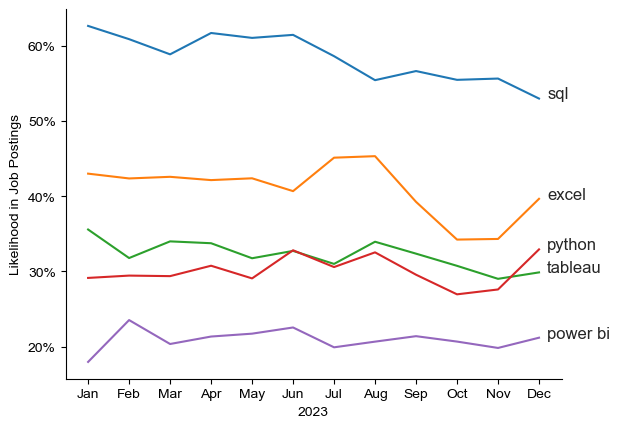

In [9]:
# Plot top 5 skills
top_skills = 5
df_DA_US_plot = df_DA_US_percent.iloc[:, :top_skills]
sns.lineplot(data=df_DA_US_plot, dashes=None, legend=None)
sns.set_theme(style="ticks")
sns.despine()
plt.xlabel("2023")
plt.ylabel("Likelihood in Job Postings")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
for i in range(top_skills):
    # to preven label text from overlapping: offset = (i - top_skills // 2) * 0.012
    plt.text(11.2, df_DA_US_plot.iloc[-1, i], df_DA_US_plot.columns[i])